<h1>Обучение с учителем: качество модели <a class="tocSkip"></h1>
   
<h2>Краткое описание<a class="tocSkip"></h2>
    
   
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
    
    
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
    
<h2>Цель проекта<a class="tocSkip"></h2>
    
Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
    
<h2>Описание данных<a class="tocSkip"></h2> 
  
    
1. <b>`market_file.csv`</b>
    
    Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    
- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит`
    — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
    
    
2. <b>`market_money.csv`</b>
    
    Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
    
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.
    
    
3. <b>`market_time.csv`</b>
    
    Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
    
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
минут — значение времени, проведённого на сайте, в минутах.
    
    
4. <b>`money.csv`</b>
    
    Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    
- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

In [1]:
!pip install matplotlib==3.5.1 -q

In [2]:
!pip install numpy==1.22.3 -q

In [3]:
!pip install --upgrade -q scikit-learn
!pip install shap -q
!pip install phik -q

In [4]:
#импортируем используемые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

#библиотека для расчета коэффициентов корреляции Фи
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix

import sklearn

# для разделения выборки
from sklearn.model_selection import train_test_split

# Создание пайплайна
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# кодировщики
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    LabelEncoder
)

# инструмент для автоподбора гиперпараметров
from sklearn.model_selection import GridSearchCV

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# метрики
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, 
    recall_score, precision_score
                            )

# импортируем модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
# Анализ важности признаков
from sklearn.inspection import permutation_importance
import shap

In [5]:
#Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

<h2><b>Оглавление</b><a class="tocSkip"></h2>

<a href='#Step0'><b>Функции, используемые в проекте</b></a>   
    
<a href='#Step1'><b>1. Загрузка данных</b></a>
    
<a href='#Step2'><b>2. Предобработка данных</b></a>
- <a href='#Step2.1'><b>2.1 Исправление ошибок в данных</b></a>
- <a href='#Step2.2'><b>2.2 Проверка на явные дубликаты и пропуски</b></a>
- <a href='#Step2.3'><b>2.3 Проверка на наличие аномалий</b></a>
- <a href='#Step2.4'><b>2.4 Вывод по разделу</b></a>
    
<a href='#Step3'><b>3. Исследовательский анализ данных</b></a>
- <a href='#Step3.1'><b>3.1 Распределение данных в `market_file`</b></a>
- <a href='#Step3.2'><b>3.2 Распределение данных в `market_money`</b></a>
- <a href='#Step3.3'><b>3.3 Распределение данных в `market_time`</b></a>
- <a href='#Step3.4'><b>3.4 Распределение данных в `money`</b></a>
- <a href='#Step3.5'><b>3.5 Отбор активных пользователей</b></a>    
- <a href='#Step3.6'><b>3.6 Вывод по разделу</b></a>
    
<a href='#Step4'><b>4. Объединение данных</b></a>
    
<a href='#Step5'><b>5. Корреляционный анализ</b></a>
- <a href='#Step5.1'><b>5.1 Рассчет коэффициентов корреляции между всеми признаками</b></a>
- <a href='#Step5.2'><b>5.2 Вывод по разделу</b></a>
    
<a href='#Step6'><b>6. Использование пайплайнов</b></a>
- <a href='#Step6.1'><b>6.1 Разделение данных на выборки</b></a>    
- <a href='#Step6.2'><b>6.2 Создание пайплайна</b></a>
- <a href='#Step6.3'><b>6.3 Создание алгоритма поиска оптимальных гиперпараметров</b></a>        
- <a href='#Step6.4'><b>6.4 Обучение алгоритма поиска оптимальных гиперпараметров</b></a>
- <a href='#Step6.5'><b>6.5 Проверка модели на адекватность</b></a>  
- <a href='#Step6.6'><b>6.6 Вывод по разделу</b></a>
    
<a href='#Step7'><b>7. Анализ важности признаков</b></a>
- <a href='#Step7.1'><b>7.1 Оценка важности признаков</b></a>
- <a href='#Step7.2'><b>7.2 Вывод по разделу</b></a>

<a href='#Step8'><b>8. Сегментация покупателей</b></a> 
- <a href='#Step8.1'><b>8.1 Исследовательский анализ</b></a>
- <a href='#Step8.2'><b>8.2 Сегментация пользователей. Исследование по сегменту акционные покупки.</b></a>    
- <a href='#Step8.3'><b>8.3 Вывод по разделу</b></a>
    
<a href='#Step9'><b>9. Общий вывод</b></a> 

<a id='Step0'></a>
<h3><b> Функции, используемые в проекте<a class="tocSkip"></h3>

In [6]:
#Функция для отображения основной информации по датафрейму

def check_df (dataframes):
    for df in dataframes:
        df_name = [name for name, obj in globals().items() if obj is df][0]
        print(f'Общая информация по датафрейму {df_name}:')
        # общая информация
        display(df.info())
        # первые 5 строк
        display(df.head())
        print()

In [7]:
#Вывод уникальных значений в датафрейме

def check_unique_in_df (dataframes, types):
    for df in dataframes:
        df_name = [name for name, obj in globals().items() if obj is df][0]
        categorical_columns = [column for column in df.columns if df[column].dtype == types]
        print(f'Уникальные значения в датафрейме {df_name}:')
        for column in categorical_columns:
            print(f'Столбец {column}: {df[column].unique()}')
        print()

In [8]:
#Функция переименования значений столбцов:

def replace_name (df, column, name, new_name):
    df[column] = df[column].replace({name: new_name})
    return print(df[column].unique())

In [9]:
#Функция переименования столбцов:

def columns_remove_spaces(dataframes):
    for df in dataframes:
        df.columns = df.columns.str.replace(' ', '_').str.lower()

In [10]:
#Функция проверки на пропущенные значения и явные дубликаты

def check_isna_dupl (dataframes):
    for df in dataframes:
        df_name = [name for name, obj in globals().items() if obj is df][0]
        print(f'В датафрейме {df_name}:')
        print(f'Количество пропущенных значений:\n{df.isna().sum()} \
        \nКоличество явных дубликатов: {df.duplicated().sum()}')
        print()

In [11]:
#Функция построения графика распределения признаков

def categoral_unique(df, col, target):   
    plt.figure(figsize=(8,6))
    plot = sns.countplot(y=col, data=df, hue=target)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_xlabel('Количество', fontsize=14)

In [12]:
#Функция построения графика гистограмм распределения

def histogram(df, col, target):
    sns.histplot(df, bins=20, kde=True, hue=target, x=col)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_ylabel('Количество', fontsize=14)

<a id='Step1'></a>
## Загрузка данных

In [13]:
try:
    market_file = pd.read_csv('/datasets/market_file.csv', decimal=',')
    market_money = pd.read_csv('/datasets/market_money.csv', decimal=',')
    market_time = pd.read_csv('/datasets/market_time.csv', decimal=',')
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
except:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv', decimal=',')
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv', decimal=',')
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv', decimal=',')
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=',')

In [14]:
check_df([market_file, market_money, market_time, money])

Общая информация по датафрейму market_file:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11 

None

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2



Общая информация по датафрейму market_money:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


None

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6



Общая информация по датафрейму market_time:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13



Общая информация по датафрейму money:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [15]:
check_unique_in_df([market_file, market_money, market_time, money], 'object')

Уникальные значения в датафрейме market_file:
Столбец Покупательская активность: ['Снизилась' 'Прежний уровень']
Столбец Тип сервиса: ['премиум' 'стандартт' 'стандарт']
Столбец Разрешить сообщать: ['да' 'нет']
Столбец Маркет_актив_6_мес: ['3.4' '4.4' '4.9' '3.2' '5.1' '3.3' '4.7' '4.2' '3.9' '4.6' '4.3' '3.8'
 '2.7' '4.8' '2.9' '3.0' '2.4' '1.7' '3.6' '4.0' '1.5' '3.5' '4.1' '3.1'
 '1.4' '0.9' '5.6' '2.6' '5.5' '5.2' '5.8' '5.0' '5.4' '5.7' '5.3' '3.7'
 '6.3' '6.6' '4.5' '6.1' '5.9']
Столбец Акционные_покупки: ['0.0' '0.75' '0.14' '0.99' '0.94' '0.26' '0.23' '0.17' '0.13' '0.35'
 '0.74' '0.29' '0.98' '0.95' '0.22' '0.4' '0.24' '0.21' '0.39' '0.9'
 '0.89' '0.27' '0.33' '0.34' '0.32' '0.93' '0.3' '0.28' '0.31' '0.25'
 '0.36' '0.16' '0.11' '0.2' '0.18' '0.15' '0.6' '0.12' '0.19' '0.44'
 '0.47' '0.91']
Столбец Популярная_категория: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']

Ун

**Первичный осмотр**

1. 4 датафрейма без пропущенных значений.
2. В `market_file` присутствуют опечатки в заполнении признаков: 
    - В столбце `Тип сервиса` - `стандартт`; 
3. В `market_time` присутствуют опечатки в заполнении признаков: 
    - В столбце `Период` - `предыдцщий_месяц`; 
4. В `market_file` типы данных класса `object` в столбцах `Маркет_актив_6_мес`, `Акционные_покупки`.
5. В `market_money` типы данных класса `object` в столбце `Выручка`.

<a id='Step2'></a>
##  Предобработка данных

<a id='Step2.1'></a>
###  Исправление ошибок в данных

В предыдущем шаге обнаружили опечатки в признаковом описании данных. Исправим на соответствующие.

In [16]:
replace_name(market_file, 'Тип сервиса', 'стандартт', 'стандарт')
replace_name(market_time, 'Период', 'предыдцщий_месяц', 'предыдущий_месяц')
market_file['Покупательская активность'] = market_file['Покупательская активность'].str.lower()
market_file['Популярная_категория'] = market_file['Популярная_категория'].str.lower()

['премиум' 'стандарт']
['текущий_месяц' 'предыдущий_месяц']


In [17]:
display(market_file.head())
display(market_time.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.0,товары для детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


Переименуем столбцы для более удобного использования

In [18]:
columns_remove_spaces([market_file, market_money, market_time, money])

In [19]:
display(market_file.columns)
display(market_money.columns)
display(market_time.columns)
money.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Index(['id', 'период', 'выручка'], dtype='object')

Index(['id', 'период', 'минут'], dtype='object')

Index(['id', 'прибыль'], dtype='object')

Изменим типы данных в датафреймах `market_file` и `market_money` на соответствующие:

In [20]:
market_file['маркет_актив_6_мес'] = pd.to_numeric(market_file['маркет_актив_6_мес'])
market_file['акционные_покупки'] = pd.to_numeric(market_file['акционные_покупки'])
market_money['выручка'] = pd.to_numeric(market_money['выручка'])

In [21]:
display(market_file.info())
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


<a id='Step2.2'></a>
###  Проверка на явные дубликаты и пропуски

Чтобы проверить данные на наличие явных дубликатов и пропусков воспользуемся функцией check_isna_dupl

In [22]:
check_isna_dupl([market_file, market_money, market_time, money])

В датафрейме market_file:
Количество пропущенных значений:
id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64         
Количество явных дубликатов: 0

В датафрейме market_money:
Количество пропущенных значений:
id         0
период     0
выручка    0
dtype: int64         
Количество явных дубликатов: 0

В датафрейме market_time:
Количество пропущенных значений:
id        0
период    0
минут     0
dtype: int64         
Количество явных дубликатов: 0

В датафрейме money:
Количество пропущенных значений:

**Пропущенных значений и дубликатов не обнаружено**

<a id='Step2.3'></a>
###  Проверка на наличие аномалий

In [23]:
display(market_file.describe())
display(market_money.describe())
display(market_time.describe())
money.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


In [24]:
market_money[market_money['выручка'] > 10000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


В `market_money` обнаружен пользователь с `id` **215380**, который принес магазину выручку за `текущий_месяц` в размере **`106862.2`**. 

При медианной выручке `4957.5` данное значение является аномальным. С этим разберемся дальше.

<a id='Step2.4'></a>
###  Вывод по разделу

1. Выгрузили данные в 4 датафрейма и обнаружили неявные дубликаты в признаковом описании:
    В `market_file` присутствуют опечатки в заполнении признаков: 
    - В столбце `Тип сервиса` - `стандартт`; 
    В `market_time` присутствуют опечатки в заполнении признаков: 
    - В столбце `Период` - `предыдцщий_месяц`; 
2. Изменили типы данных:
    - В `market_file` типы данных класса `object` в столбцах `Маркет_актив_6_мес`, `Акционные_покупки` на `float`
    - В `market_money` типы данных класса `object` в столбце `Выручка` на `float`
3. Переименовали столбцы: заменили пробелы на `_` и привели к нижнему регистру.
4. Не обнаружили пропусков и явных дубликатов.
5. Используя описательную статистку нашли аномальное значение в `market_money` пользователя с аномальной **выручкой** равной `106862.2` при медианной `4957.5`.

<a id='Step3'></a>
##  Исследовательский анализ данных

1. Проведем исследовательский анализ данных из каждой таблицы. 
2. Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

<a id='Step3.1'></a>
###  Распределение данных в `market_file`

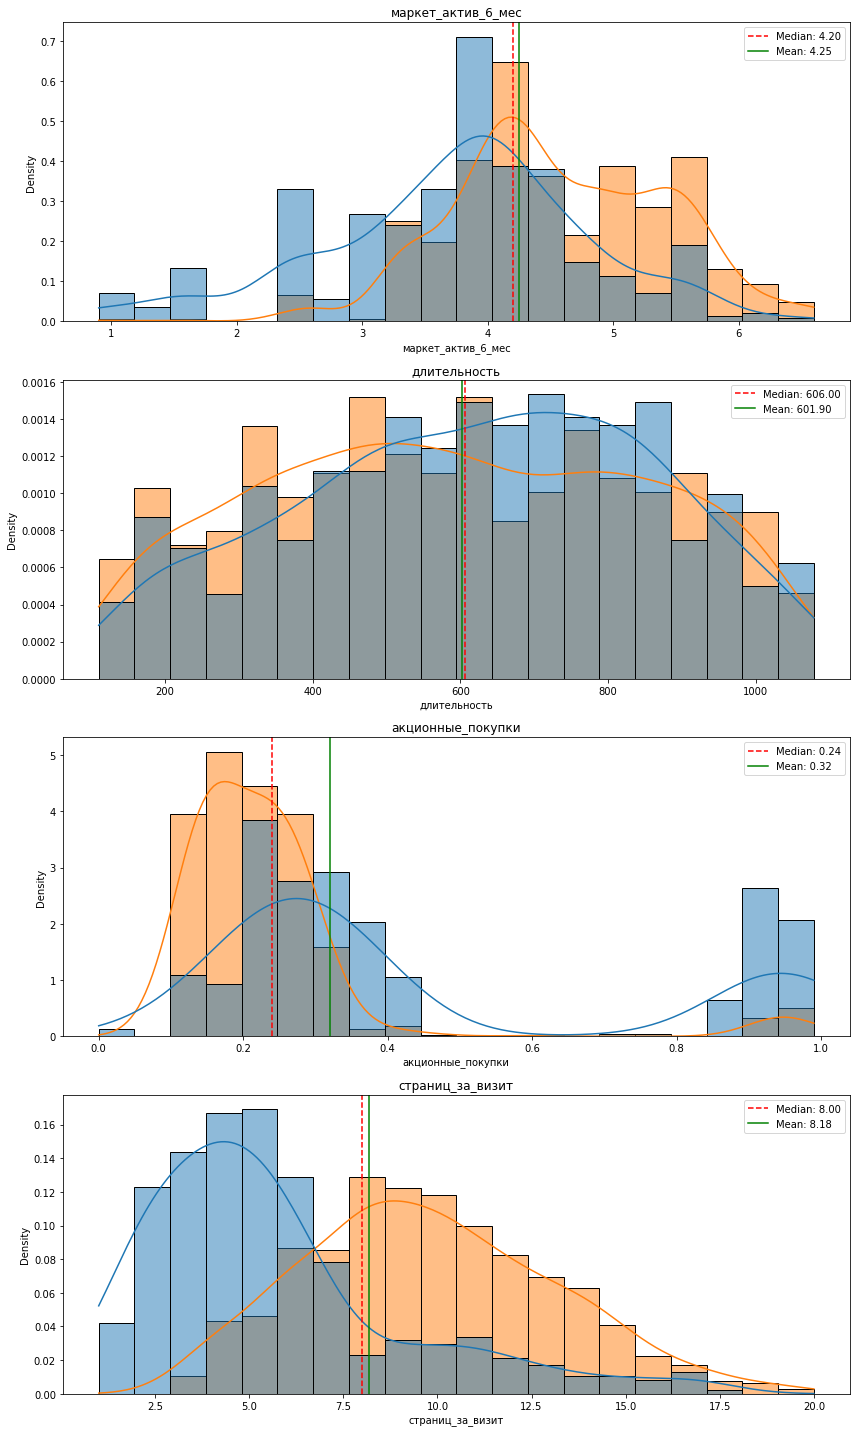

In [25]:
# Создание графика с 8 подграфиками в два столбца
fig, axes = plt.subplots(4, 1, figsize=(12, 20))

# Преобразование 2D массива подграфиков в 1D для удобного индексирования
axes = axes.ravel()

# Построение гистограммы с ядерной оценкой плотности для каждого столбца
for i, column in enumerate([
    'маркет_актив_6_мес', 'длительность', 'акционные_покупки',
    'страниц_за_визит'
]):
    sns.histplot(data=market_file, bins=20, kde=True, ax=axes[i], 
                 x=column, hue=market_file['покупательская_активность'], stat='density', common_norm=False)
    axes[i].set_title(column)
    
    # Добавление медианы и среднего значения
    median_value = market_file[column].median()
    mean_value = market_file[column].mean()
    axes[i].axvline(median_value, color='r', linestyle='--', label=f'Median: {median_value:.2f}')
    axes[i].axvline(mean_value, color='g', linestyle='-', label=f'Mean: {mean_value:.2f}')
    axes[i].legend()
    axes[0].legend(loc='upper right')

# Показать графики
plt.tight_layout()
plt.show();

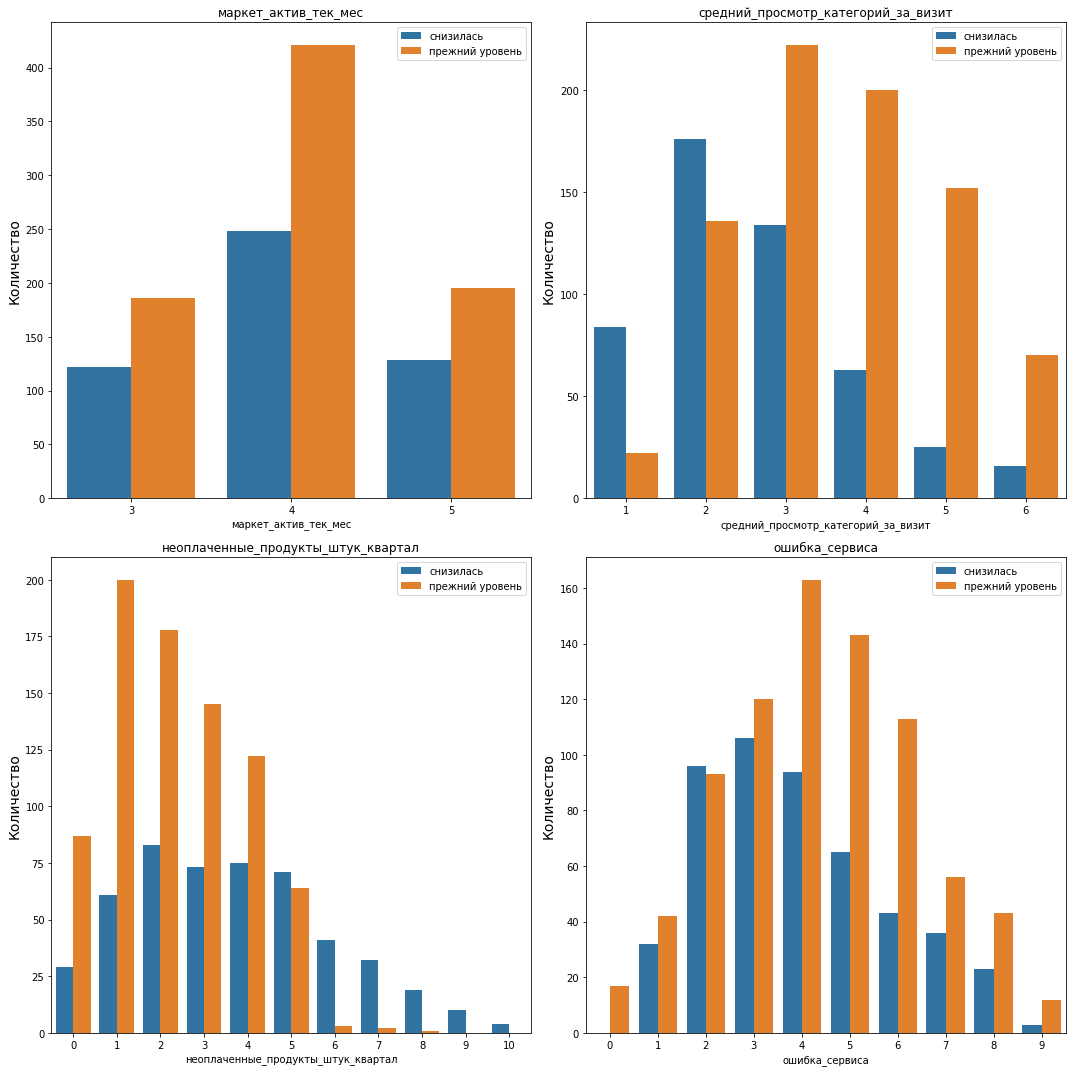

In [26]:
# Создание графика с 8 подграфиками в два столбца
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Преобразование 2D массива подграфиков в 1D для удобного индексирования
axes = axes.ravel()

# Построение гистограмм
for i, column in enumerate([
    'маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса'
]):
    sns.countplot(data=market_file, ax=axes[i], 
                 x=column, hue=market_file['покупательская_активность'])
    axes[i].set_title(column)
    axes[i].set_ylabel('Количество', fontsize=14)
    axes[i].legend()
    axes[i].legend(loc='upper right')   
    
# Показать графики
plt.tight_layout()
plt.show();

**Распределение количественных признаков**

- `маркет_актив_6_мес` - распределение близко к нормальному со смещением вправо. Медиана и среднее практически совпадают - `4.2` и `4.253769` соответственно.
- `маркет_актив_тек_мес` - преобладает признак со значением `4` - практически в два раза больше остальных `3` и `5`
- `длительность` - данные распределены практически равномерно с небольшими выбивающимися значениями. Медиана и среднее практически совпадают - `606` и `601.898462` соответственно.
- `акционные_покупки` - явная ассиметрия распределения данных. Видно распределение данных на два кластера - пользователи, которые особо не пользуются акциями и пользователи, которые следят за акциями постоянно. 
- `средний_просмотр_категорий_за_визит` - распределены нормально с превалирующим значением признака `3`.
- `неоплаченные_продукты_штук_квартал` - смещение распределения влево в сторону уменьшения вправо. Медиана и среднее равны `3` и `2.84` соответственно.
- `ошибка_сервиса` - данные распределены нормально со значениями от `0 до 9`.
- `страниц_за_визит` - распределение стремится к нормальному со смещением влево. С увеличением значениям признака график убывает.

**Рассмотрим распределение категориальных данных на предмет дисбаланса данных**

array(['снизилась', 'прежний уровень'], dtype=object)

array(['премиум', 'стандарт'], dtype=object)

array(['да', 'нет'], dtype=object)

array(['товары для детей', 'домашний текстиль', 'косметика и аксесуары',
       'техника для красоты и здоровья', 'кухонная посуда',
       'мелкая бытовая техника и электроника'], dtype=object)

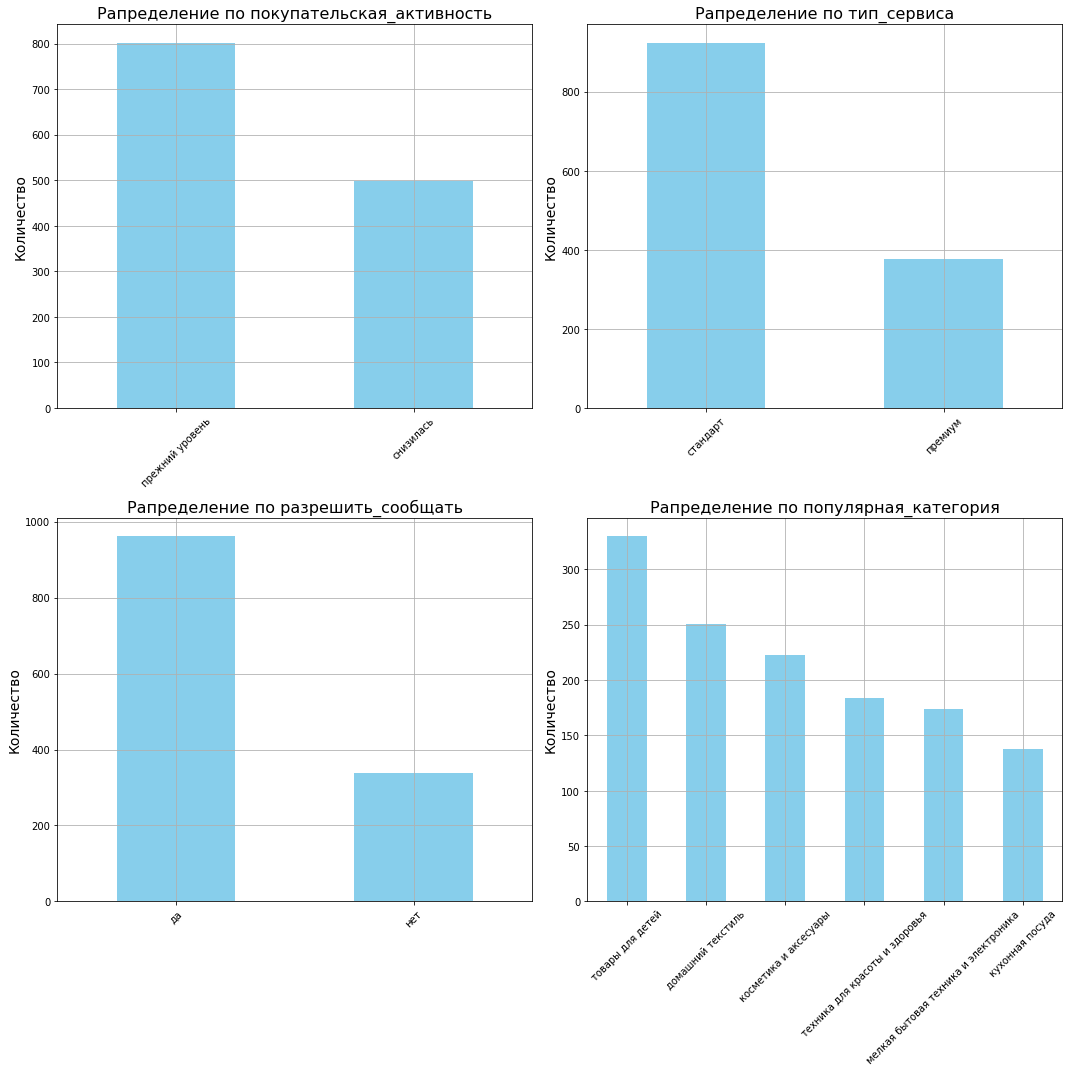

In [27]:
# Создание графика с 4 подграфиками в два столбца
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()
for i, column in enumerate(['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория'
                        ]):
    display(market_file[column].unique())
    market_file[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', grid=True)
    axes[i].set_ylabel('Количество', fontsize=14)
    axes[i].set_title(f'Рапределение по {column}', fontsize=16)
    axes[i].tick_params(axis='x', labelrotation=45)
    
plt.tight_layout()
plt.show();

**Распределение категориальных признаков**

- Целевой признак распределен неравномерно. Значения `прежний уровень` практически в два раза больше, чем `снизилась`.
- `тип_сервиса` - превалирует значение `стандарт`. Пользователей с премиум подпиской меньше более чем в два раза.
- `разрешить_сообщать` - в основном пользователи разрешают присылать дополнительные предложения о товаре.
- `популярная_категория` - самая популярная категория - `товары для детей`. Меньше всего куплено товаров из категории `кухонная посуда`.

<a id='Step3.2'></a>
###  Распределение данных в `market_money`

**Распределение количественного признака `Выручка`**

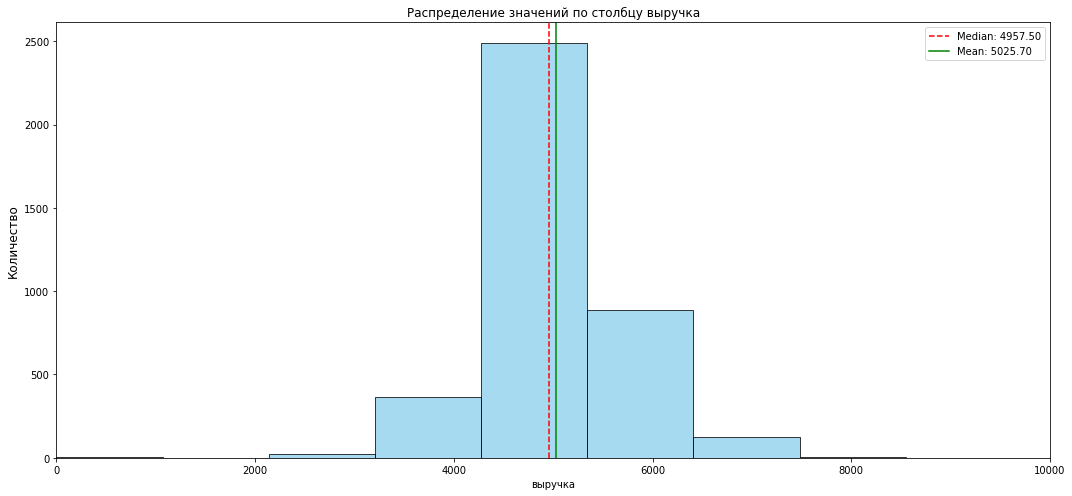

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(15, 7))

sns.histplot(data=market_money, bins=100, kde=False, x='выручка', ax=axes, color='skyblue')
median_value = market_money['выручка'].median()
mean_value = market_money['выручка'].mean()
axes.set_title('Распределение значений по столбцу выручка')
axes.axvline(median_value, color='r', linestyle='--', label=f'Median: {median_value:.2f}')
axes.axvline(mean_value, color='g', linestyle='-', label=f'Mean: {mean_value:.2f}')
axes.set_ylabel('Количество', fontsize=12)
axes.legend()


plt.xlim(0, 10000)
plt.tight_layout()
plt.show();    

**Выручка распределена нормально вокруг медианы `5025,70`. Существует одно выбивающееся аномальное значение выручки пользователя, которое в будущем не будем считать**

**Распределение категориального признака `Период`**

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

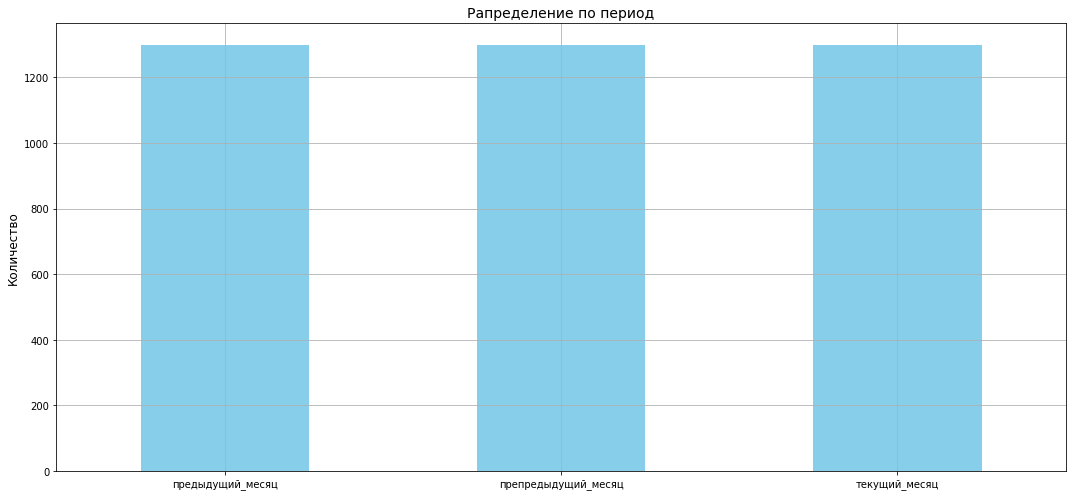

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(15, 7))
display(market_money['период'].unique())
market_money['период'].value_counts().plot(kind='bar', ax=axes, color='skyblue', grid=True)
axes.set_ylabel('Количество', fontsize=12)
axes.set_title('Рапределение по период', fontsize=14)
axes.tick_params(axis='x', labelrotation=0)

plt.tight_layout()
plt.show();

**Значения признака `Период` распределены одинаково по всем трем месяцам**

<a id='Step3.3'></a>
###  Распределение данных в `market_time`

**Распределение количественного признака**

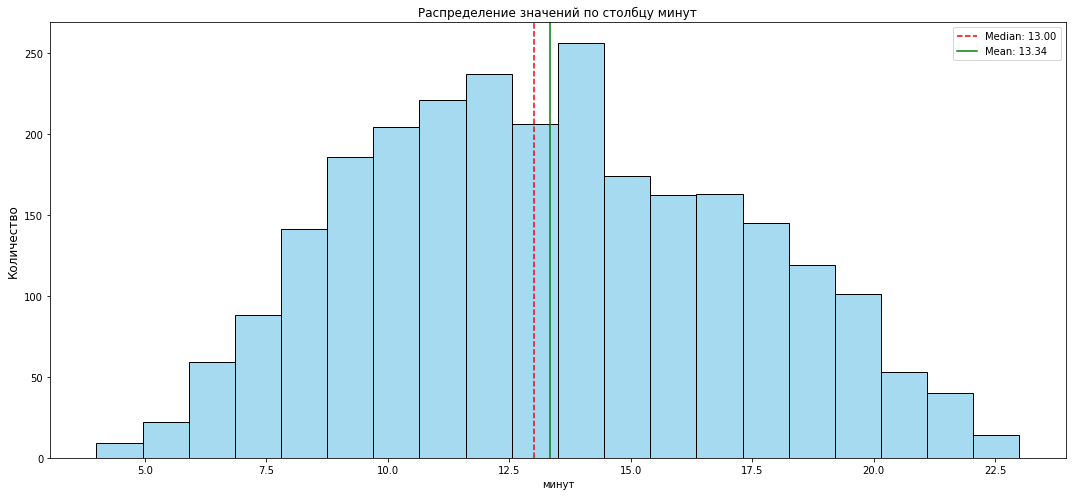

In [30]:
fig, axes = plt.subplots(1, 1, figsize=(15, 7))

sns.histplot(data=market_time, bins=20, kde=False, x='минут', ax=axes, color='skyblue')
median_value = market_time['минут'].median()
mean_value = market_time['минут'].mean()
axes.set_title('Распределение значений по столбцу минут')
axes.axvline(median_value, color='r', linestyle='--', label=f'Median: {median_value:.2f}')
axes.axvline(mean_value, color='g', linestyle='-', label=f'Mean: {mean_value:.2f}')
axes.set_ylabel('Количество', fontsize=12)
axes.legend()


plt.tight_layout()
plt.show();    

**Данные распределены нормально с медианой `13` и средним значением `13,34`**

**Распределение категориального признака**

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

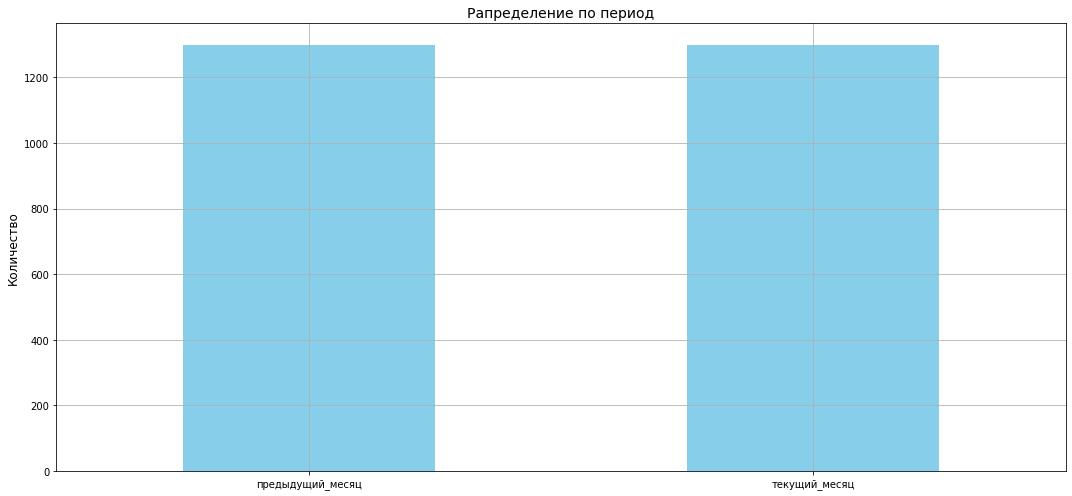

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(15, 7))
display(market_time['период'].unique())
market_time['период'].value_counts().plot(kind='bar', ax=axes, color='skyblue', grid=True)
axes.set_ylabel('Количество', fontsize=12)
axes.set_title('Рапределение по период', fontsize=14)
axes.tick_params(axis='x', labelrotation=0)
    
plt.tight_layout()
plt.show();

**Категориальные признаки распределены одинаково между собой**

Единственное отсутствуют данные за предпредыдущий месяц (тоесть за первый месяц из трех)

<a id='Step3.4'></a>
###  Распределение данных в `money`

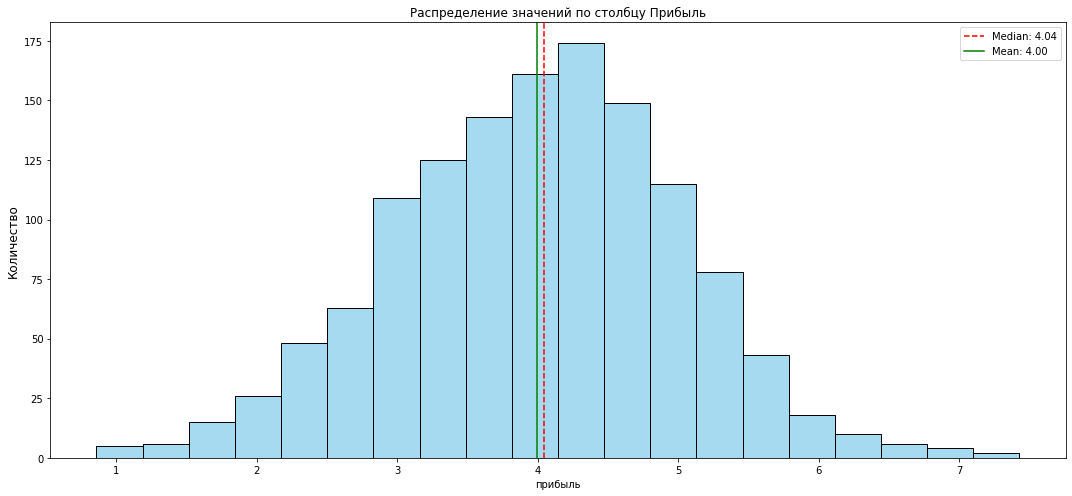

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(15, 7))

sns.histplot(data=money, bins=20, kde=False, x='прибыль', ax=axes, color='skyblue')
median_value = money['прибыль'].median()
mean_value = money['прибыль'].mean()
axes.set_title('Распределение значений по столбцу Прибыль')
axes.set_ylabel('Количество', fontsize=12)
axes.axvline(median_value, color='r', linestyle='--', label=f'Median: {median_value:.2f}')
axes.axvline(mean_value, color='g', linestyle='-', label=f'Mean: {mean_value:.2f}')
axes.legend()


plt.tight_layout()
plt.show();    

**Данные распределены нормально с медианой `4` и средним значением `4,04`**

<a id='Step3.5'></a>
###  Отбор активных клиентов

Отберем клиентов, у которых была активность во всех трех месяцах, тоесть в `препредыдущий_месяц`, `текущий_месяц`, `предыдущий_месяц`. 

Считаем, что если выручка в одном из месяцев равна 0, то такие пользователи `неактивные`.

Сразу уберем пользователя, который принес аномальную вырочку - такие данные негативно повлияют в будущем на нашу модель

In [33]:
bad_id = market_money[(market_money['выручка'] == 0) | (market_money['выручка'] > 50000)]['id'].unique()

In [34]:
market_file = market_file.query('id not in @bad_id')
len(market_file)

1296

- Убрали 3 пользователя, не удовлетворяющих условиям - покупки в каждом из трех последних месяцев.
- Также убрали 1 пользователя с аномально высокой выручкой равной `106862.2`

<a id='Step3.6'></a>
###  Вывод по разделу

**Провели исследовательский анализ** каждого отдельного датафрейма и посмотрели распределение категориальных и количественных признаков:

1. **Распределение количественных признаков**

- `маркет_актив_6_мес` - распределение близко к нормальному со смещением вправо. Медиана и среднее практически совпадают - `4.2` и `4.253769` соответственно.
- `маркет_актив_тек_мес` - преобладает признак со значением `4` - практически в два раза больше остальных `3` и `5`
- `длительность` - данные распределены практически равномерно с небольшими выбивающимися значениями. Медиана и среднее практически совпадают - `606` и `601.898462` соответственно.
- `акционные_покупки` - явная ассиметрия распределения данных. Видно распределение данных на два кластера - пользователи, которые особо не пользуются акциями и пользователи, которые следят за акциями постоянно. 
- `средний_просмотр_категорий_за_визит` - распределены нормально с превалирующим значением признака `3`.
- `неоплаченные_продукты_штук_квартал` - смещение распределения влево в сторону уменьшения вправо. Медиана и среднее равны `3` и `2.84` соответственно.
- `ошибка_сервиса` - данные распределены нормально со значениями от `0 до 9`.
- `страниц_за_визит` - распределение стремится к нормальному со смещением влево. С увеличением значениям признака график убывает.
- `выручка` распределена нормально вокруг медианы `5025,70`. Существует одно выбивающееся аномальное **максимальное** значение выручки пользователя, которое в будущем не будем считать.
- `минуты` (значение времени, проведённого на сайте, в минутах.) распределены нормально с медианой `13` и средним значением `13,34`
- `прибыль`- данные распределены нормально с медианой `4` и средним значением `4,04`

2. **Распределение категориальных признаков**

- Целевой признак распределен неравномерно. Значения `прежний уровень` практически в два раза больше, чем `снизилась`.
- `тип_сервиса` - превалирует значение `стандарт`. Пользователей с премиум подпиской меньше более чем в два раза.
- `разрешить_сообщать` - в основном пользователи разрешают присылать дополнительные предложения о товаре.
- `популярная_категория` - самая популярная категория - `товары для детей`. Меньше всего куплено товаров из категории `кухонная посуда`.
- Значения признака `Период` распределены одинаково по всем трем месяцам.


- **В `market_time` отсутствуют данные за первый месяц из трех (`предпредыдущий месяц`) по времени нахождения пользователей на сайте. Видимо учет начался совсем недавно**


3. Убрали из выборки пользователей, которые не совершали покупки в любом из трех месяцев - таких пользователей считаем неактивными. Также убрали 1 пользователя с аномально высокой выручкой равной `106862.2`

<a id='Step4'></a>
##  Объединение таблиц

- Объединим таблицы `market_file`, `market_money`, `market_time`. Данные о прибыли из датафрейма `money` при моделировании не понадобятся. 
- Учтем, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. 
- В итоговой таблице сделаем отдельный столбец для каждого периода.

In [35]:
market_money_grouped = market_money.pivot_table(index=['id'], columns=["период"])
market_money_grouped.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_grouped['id'] = market_money_grouped.index

market_time_grouped = market_time.pivot_table(index=['id'], columns=["период"])
market_time_grouped.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_grouped['id'] = market_time_grouped.index

market_full = market_file.join(market_money_grouped, on='id', lsuffix="_left", rsuffix="_выручка")
market_full = market_full.rename(columns={'id_left':'id'})
market_full = market_full.join(market_time_grouped, on='id', lsuffix="_left", rsuffix="_минут")
market_full = market_full.rename(columns={'id_left':'id'})
market_full = market_full.drop(['id_выручка', 'id_минут'], axis=1)
display(market_full.shape)
market_full.head()

(1296, 18)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [36]:
market_full.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

**Объединили данные. Ничего не потеряли, лишнего не присоединили. 1296 строк и 18 столбов в результирующем датафрейме `market_full`. Пропущенных значений после объединения нет.**

<a id='Step5'></a>
##  Корреляционный анализ

- Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. 
- Сделаеем выводы о мультиколлинеарности.

<a id='Step5.1'></a>
###  Рассчет коэффициентов корреляции между всеми признаками

В данном случае корреляция Пирсона не подходит для категориальных признаков.

Коэффициент корреляции Фи, находит взаимосвязь между категориальными, порядковыми и интервальными признаками. Чем ближе его значение по модулю к 1, тем сильнее связь.



- При использовании **phik** настроим параметр **interval_cols**, передав ему список с названиями количественных признаков. 
Phik разделяет признаки на категориальные и количественные автоматически, но часто совершает ошибки, поэтому правильно будет указать все в явном виде.

In [37]:
#interval_cols = market_full.drop('id', axis=1).select_dtypes(include='number').columns.tolist()

interval_cols = ['маркет_актив_6_мес', 'длительность', 
                 'акционные_покупки', 'выручка_препредыдущий_месяц', 
                 'выручка_предыдущий_месяц', 'выручка_текущий_месяц'
                ]

In [38]:
f_corr_matr = market_full.drop(columns=['id']).phik_matrix(interval_cols=interval_cols)
f_corr_matr

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
покупательская_активность,1.000000,0.129940,0.000000,0.544831,0.000000,0.099901,0.506276,0.299717,0.539607,0.405041,0.224154,0.747331,0.224638,0.497393,0.197213,0.604355,0.569983
тип_сервиса,0.129940,1.000000,0.289965,0.089911,0.045258,0.401411,0.030010,0.070809,0.185391,0.113015,0.079515,0.087776,0.000000,0.069704,0.124216,0.121210,0.061764
разрешить_сообщать,0.000000,0.289965,1.000000,0.000000,0.052618,0.253831,0.012198,0.073684,0.070359,0.162524,0.021839,0.097094,0.080842,0.000000,0.060907,0.063528,0.000000
маркет_актив_6_мес,0.544831,0.089911,0.000000,1.000000,0.079854,0.000000,0.279553,0.150386,0.206788,0.217731,0.142401,0.376035,0.155476,0.315331,0.039795,0.322830,0.331480
маркет_актив_тек_мес,0.000000,0.045258,0.052618,0.079854,1.000000,0.174233,0.000000,0.136243,0.246633,0.142887,0.116946,0.000000,0.051824,0.000000,0.000000,0.166871,0.079883
длительность,0.099901,0.401411,0.253831,0.000000,0.174233,1.000000,0.000000,0.000000,0.186795,0.128222,0.175608,0.128089,0.125572,0.113200,0.147048,0.046299,0.021117
акционные_покупки,0.506276,0.030010,0.012198,0.279553,0.000000,0.000000,1.000000,0.122385,0.199180,0.246665,0.000000,0.350714,0.060733,0.226381,0.071094,0.314140,0.287292
популярная_категория,0.299717,0.070809,0.073684,0.150386,0.136243,0.000000,0.122385,1.000000,0.226116,0.254746,0.000000,0.177637,0.252097,0.043528,0.237240,0.218727,0.113774
средний_просмотр_категорий_за_визит,0.539607,0.185391,0.070359,0.206788,0.246633,0.186795,0.199180,0.226116,1.000000,0.334927,0.070315,0.293781,0.098440,0.176828,0.092597,0.219174,0.236298
неоплаченные_продукты_штук_квартал,0.405041,0.113015,0.162524,0.217731,0.142887,0.128222,0.246665,0.254746,0.334927,1.000000,0.000000,0.310843,0.193536,0.189320,0.166017,0.194298,0.158243


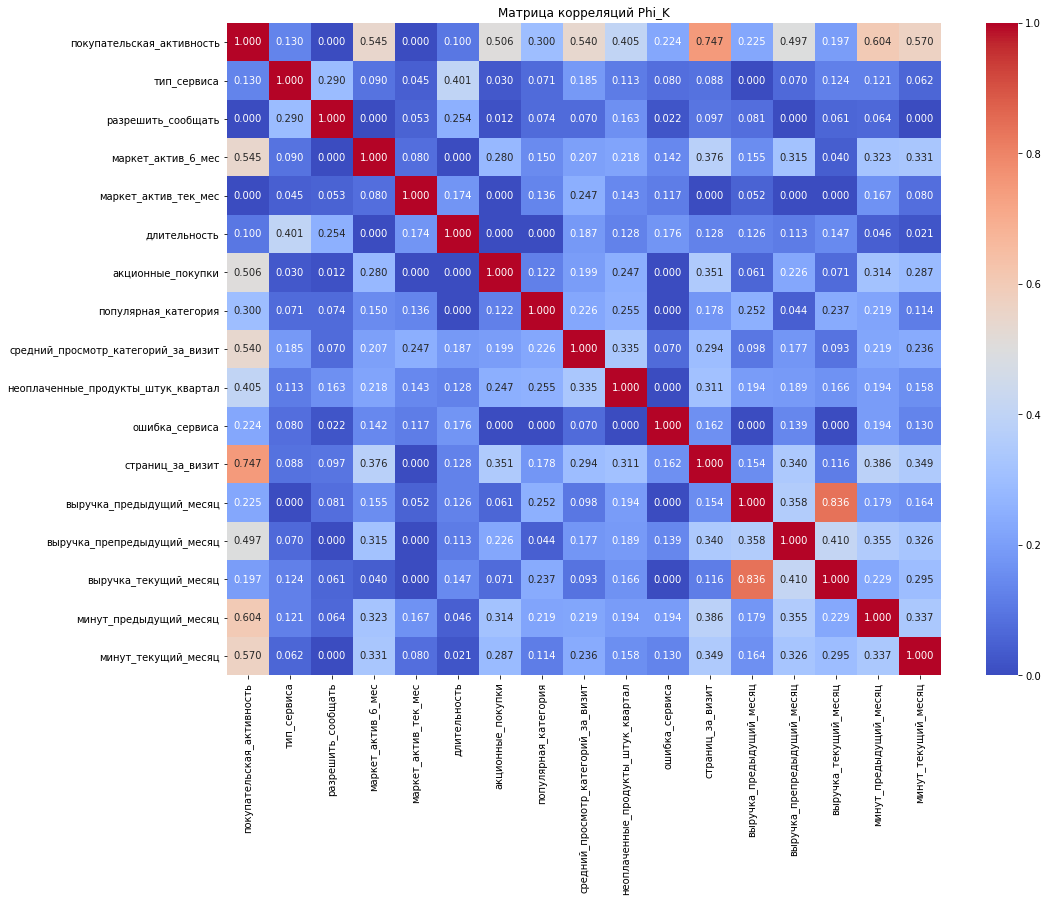

In [39]:
#Построение тепловой карты методом sns.heatmap()
plt.figure(figsize=(16, 12))
sns.heatmap(f_corr_matr, annot=True, cmap='coolwarm', fmt='.3f')
#plt.xticks(rotation=45)
plt.title('Матрица корреляций Phi_K')
plt.show()

Теперь построим корреляционную матрицу для каждого отдельного значения целевого признака

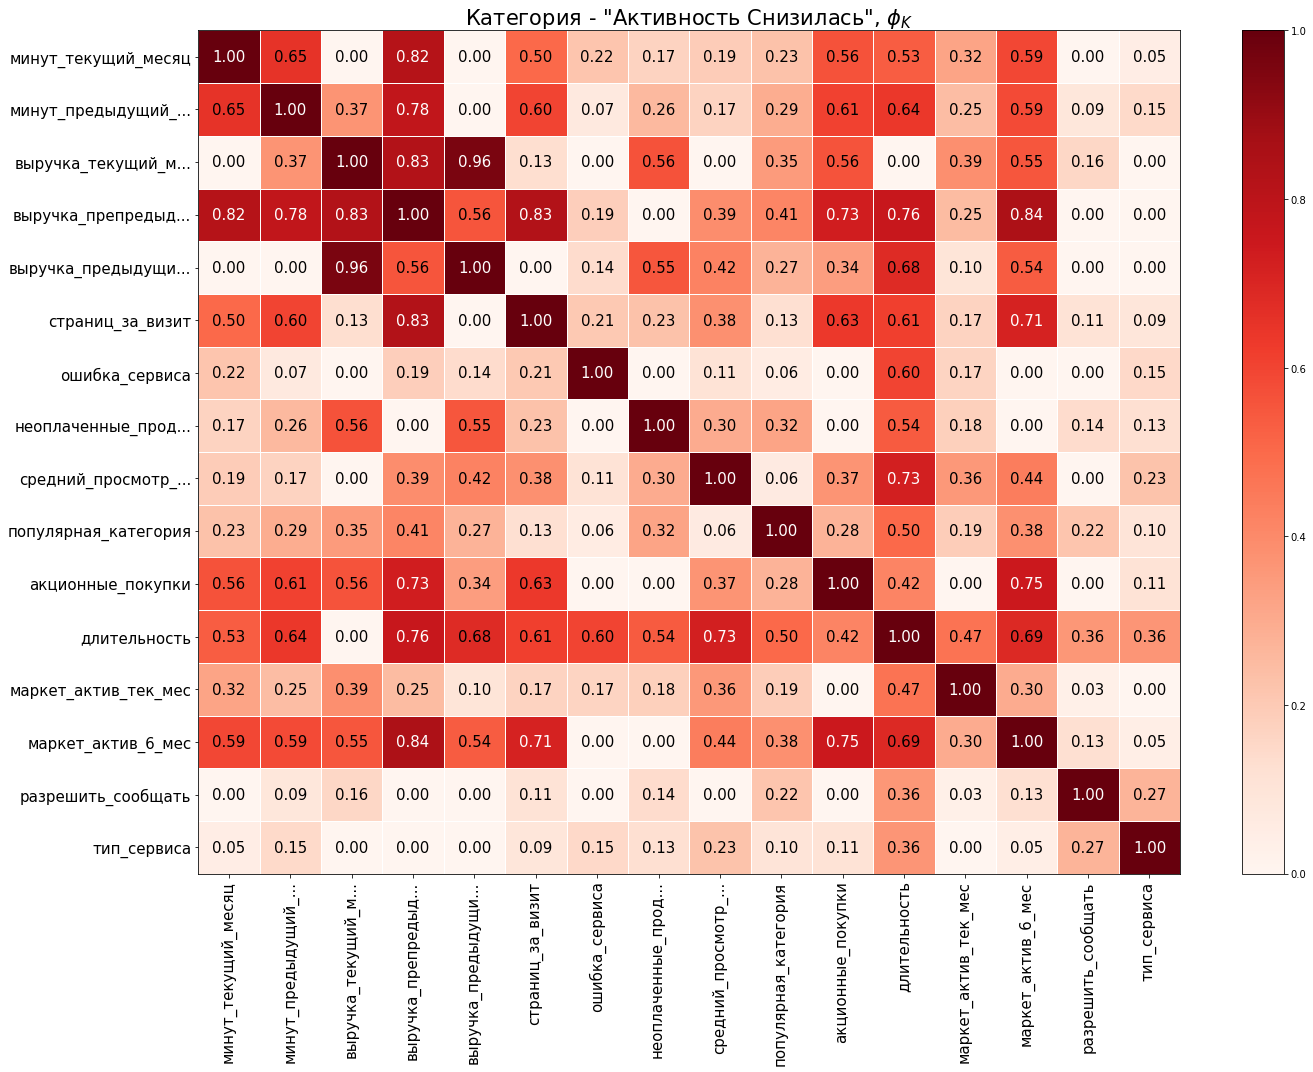

In [40]:
phik_overview_1category = phik_matrix(
    market_full[market_full['покупательская_активность']=='снизилась']
    .drop(['id', 'покупательская_активность'],axis=1), 
    interval_cols=interval_cols, bins=100
)

plot_correlation_matrix(
    phik_overview_1category.values,
    x_labels=phik_overview_1category.columns,
    y_labels=phik_overview_1category.index,
    vmin=0, vmax=1, color_map='Reds',
    title=r'Категория - "Активность Снизилась", $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

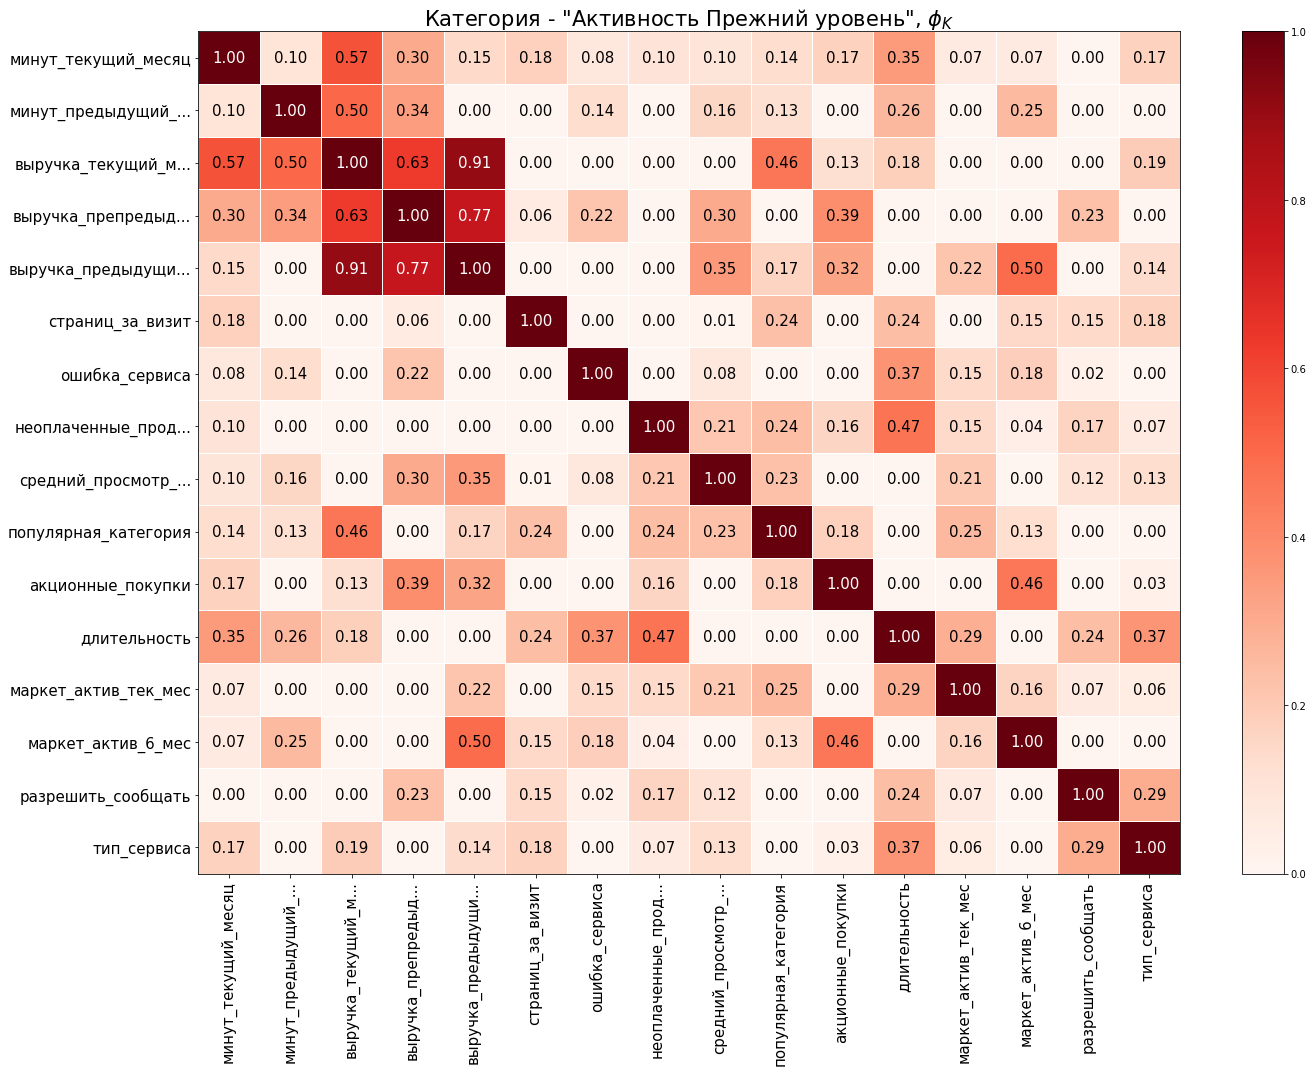

In [41]:
phik_overview_2category = phik_matrix(
    market_full[market_full['покупательская_активность']=='прежний уровень']
    .drop(['id', 'покупательская_активность'],axis=1), 
    interval_cols=interval_cols, bins=100
)

plot_correlation_matrix(
    phik_overview_2category.values,
    x_labels=phik_overview_2category.columns,
    y_labels=phik_overview_2category.index,
    vmin=0, vmax=1, color_map='Reds',
    title=r'Категория - "Активность Прежний уровень", $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Шкала Чеддока используется для оценки силы связи коэффициентов корреляции - другими словами величина коэффициента корреляции показывает силу связи. Используется следующая таблица для оценки силы связи:

- 0 - 0.3 - очень слабая
- 0.3 - 0.5 - слабая
- 0.5 - 0.7 - средняя
- 0.7 - 0.9 - высокая
- 0.9 - 1 - очень высокая

Из-за мультиколлинеарности коэффициенты модели могут стать неустойчивыми и в целом скажется на работе моделей. Сложнее будет интерпретировать ее.

**Примем значение 0.75 выше, которого будем считать, что наблюдается мультиколинеальность - очень высокая.** 

- `выручка_предыдущий_месяц` и `выручка_препредыдущий_месяц` имеет очень высокую корреляцию с самым большим количеством остальных признаков. Принимаем решение его исключить из выборки.
- построим потом повторно матрицы корреляции после исключения признака.

In [42]:
market_full = market_full.drop(columns=['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц'], axis=1)

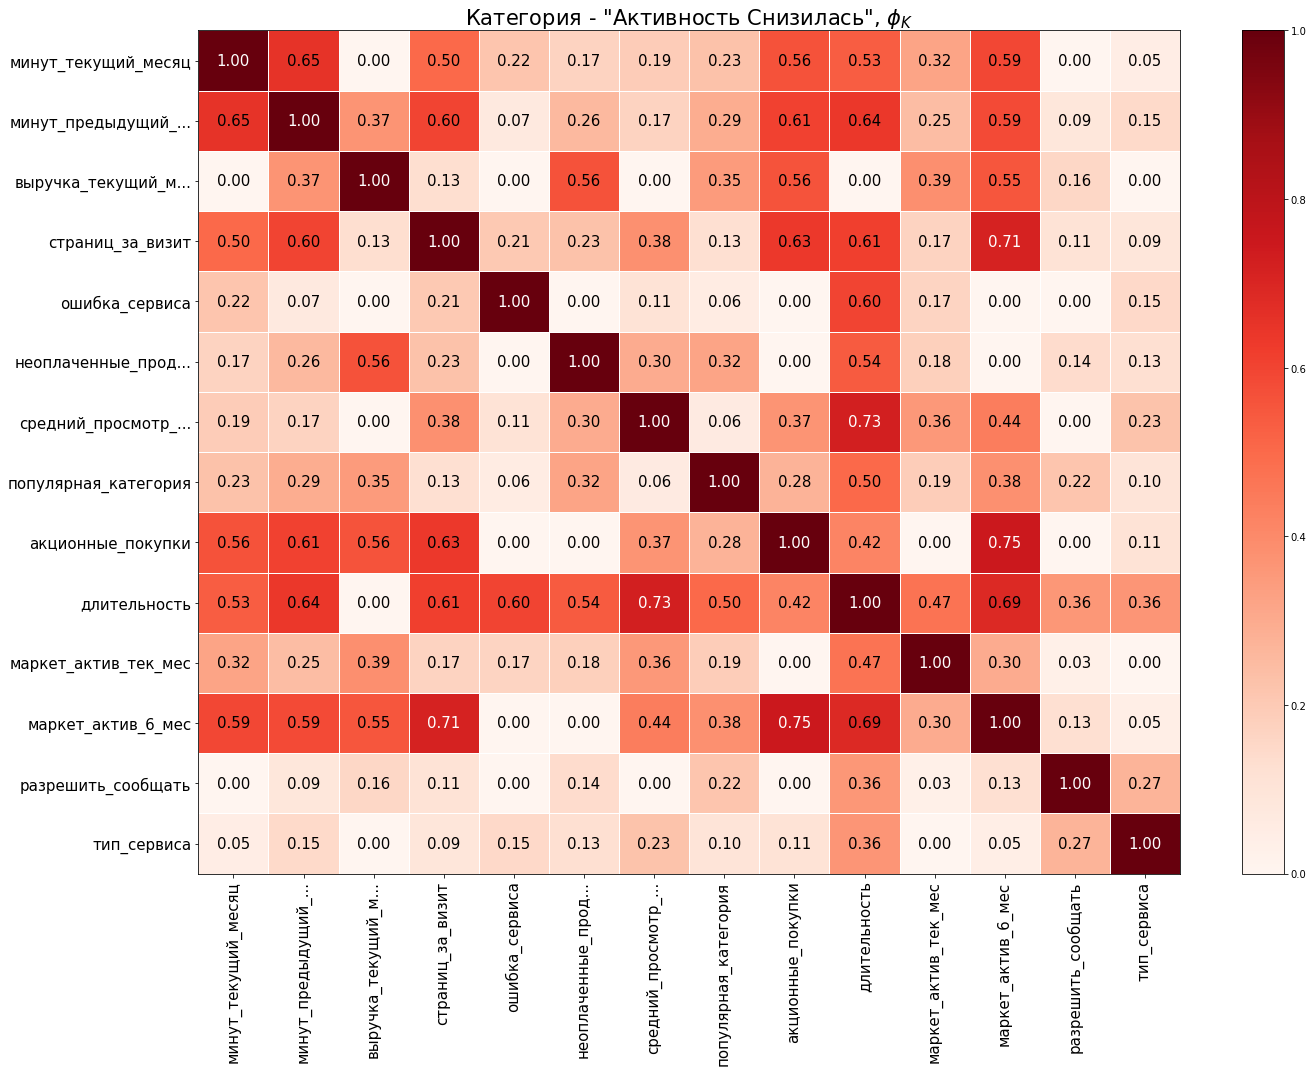

In [43]:
phik_overview_1category_after_drop = phik_matrix(
    market_full[market_full['покупательская_активность']=='снизилась']
    .drop(['id', 'покупательская_активность'],axis=1), 
    interval_cols=interval_cols, bins=100
)

plot_correlation_matrix(
    phik_overview_1category_after_drop.values,
    x_labels=phik_overview_1category_after_drop.columns,
    y_labels=phik_overview_1category_after_drop.index,
    vmin=0, vmax=1, color_map='Reds',
    title=r'Категория - "Активность Снизилась", $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

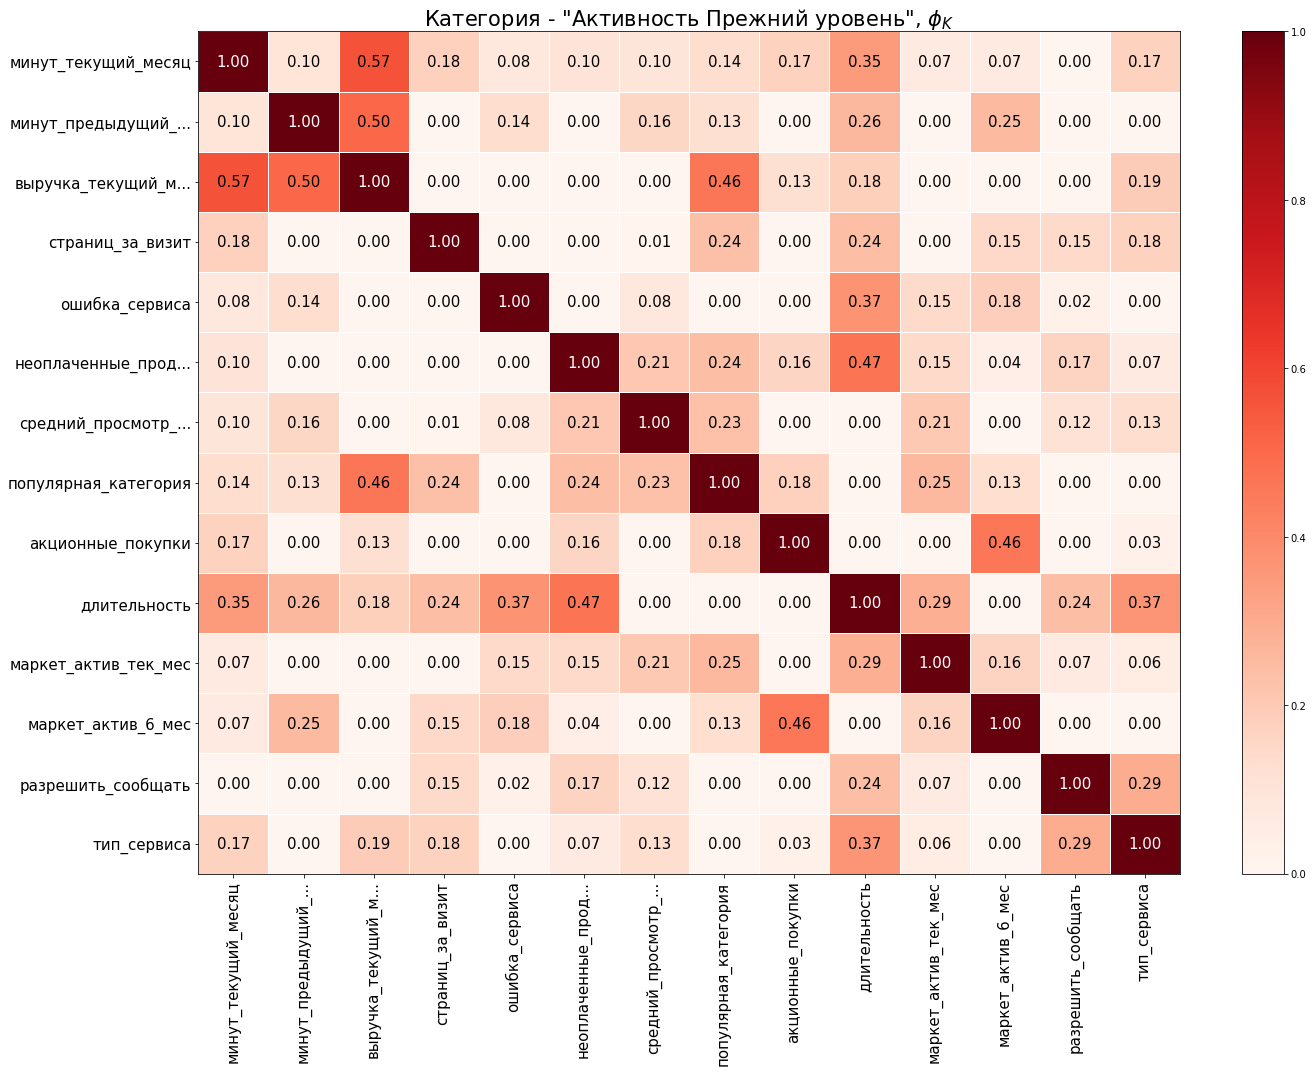

In [44]:
phik_overview_2category_after_drop = phik_matrix(
    market_full[market_full['покупательская_активность']=='прежний уровень']
    .drop(['id', 'покупательская_активность'],axis=1), 
    interval_cols=interval_cols, bins=100
)

plot_correlation_matrix(
    phik_overview_2category_after_drop.values,
    x_labels=phik_overview_2category_after_drop.columns,
    y_labels=phik_overview_2category_after_drop.index,
    vmin=0, vmax=1, color_map='Reds',
    title=r'Категория - "Активность Прежний уровень", $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

<a id='Step5.2'></a>
###  Вывод по этапу

- Построили и визуализировали матрицы корреляции методом `phik_matrix` и `plot_correlation_matrix`
- `выручка_предыдущий_месяц` и `выручка_препредыдущий_месяц` имеет очень высокую корреляцию с самым большим количеством остальных признаков.
- **После исключения входного признака `выручка_предыдущий_месяц` и `выручка_препредыдущий_месяц` ситуация улучшилась, НО потеряли данные по выручке за первые два месяца. Если модели будут плохо работать - вернемся и изменим варианты удаления признаков**

<a id='Step6'></a>
##  Использование пайплайнов

Будем использовать модели `KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC().`

- Подготовим данные перед созданием пайплайнов.

1. Разобьем данные на тренировочную и тестовую выборки;
2. Разобьем данные на количественные и категориальные, при этом категориальные данные поделим на две группы для кодирования с помощью OneHotEncoder и OrdinalEncoder;
3. Соберем пайплайн для кодирования категориальных данных с помощью OneHotEncoder;
4. Соберем пайплайн для кодирования категориальных данных с помощью OrdinalEncoder;
5. Объединим все пайплайны вместе с масштабированием количественных данных в один общий пайплайн.

<a id='Step6.1'></a>
###  Разделение данных на выборки

In [45]:
#Отделим входные признаки от целевого признака
market_full_not_ind = market_full.set_index('id')
X = market_full_not_ind.drop(['покупательская_активность'], axis=1)
y = market_full['покупательская_активность']

In [46]:
#Разделим выборки на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((972, 14), (324, 14))

Посмотрим на дисбаланс данных целевого признака

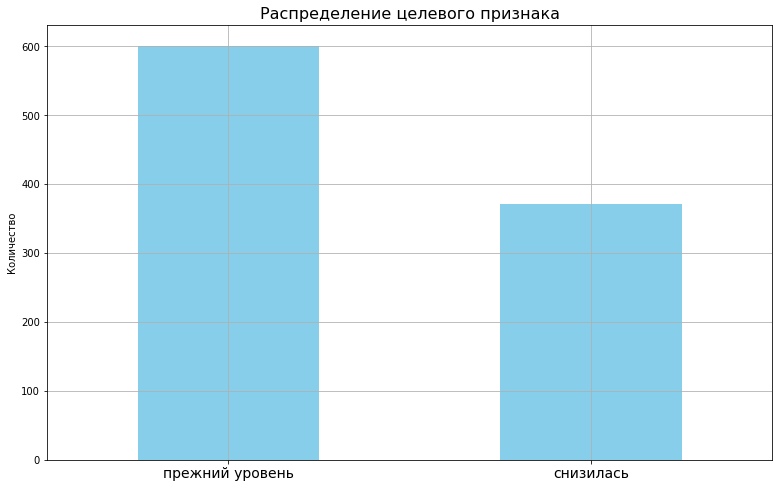

In [47]:
y_train.value_counts().plot(kind='bar', color='skyblue', grid=True, figsize=(13, 8))
plt.xticks(rotation=0, fontsize=14)
plt.ylabel('Количество') 
plt.title('Распределение целевого признака', fontsize=16)
plt.show()

**Присутствует дисбаланс** в целевом признаке. Признаков со значением `снизилась` практически в два раза меньше чем `прежний уровень`.

Устранять на данном этапе не будем, потому что в пайплайнах будет происходить кросс-валидация, а сэмплирование валидационных данных приведет к завышению оценки качества модели.

<a id='Step6.2'></a>
###  Создание пайплайна

In [48]:
X_train.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,0.15,мелкая бытовая техника и электроника,2,4,7,16,6014.2,20,6
215361,стандарт,да,5.1,4,199,0.23,техника для красоты и здоровья,4,5,2,3,3789.7,11,13
215884,стандарт,да,4.3,5,997,0.17,мелкая бытовая техника и электроника,5,1,3,11,3798.4,13,10
216564,стандарт,да,5.6,4,342,0.94,кухонная посуда,2,7,5,8,4766.2,14,19
215715,премиум,да,3.6,5,873,0.39,товары для детей,3,2,2,5,4600.0,10,10


In [49]:
print(sklearn.__version__)

1.6.1


In [50]:
#Созадим списки с распределением столбов для кодирования

num_columns = X_train.select_dtypes(include='number').columns.tolist()
#ohe_columns = X_train.select_dtypes(exclude='number').drop(columns=['популярная_категория'], axis=1).columns.tolist()
#ord_columns = ['популярная_категория']

ohe_columns = ['популярная_категория']
ord_columns = X_train.select_dtypes(exclude='number').drop(columns=['популярная_категория'], axis=1).columns.tolist()

In [51]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [52]:
# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [53]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [54]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

<a id='Step6.3'></a>
###  Создание алгоритма поиска оптимальных гиперпараметров

In [55]:
param_distributions = [
    # словарь для модели KNeighborsClassifier() 
    {
        # название модели
        'models': [KNeighborsClassifier()],
        # указываем гиперпараметр модели n_neighbors
        'models__n_neighbors': range(1, 20),
        # указываем список методов масштабирования
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='rbf', probability=True)],
        'models__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE,
                                      solver='liblinear',
                                      penalty='l1'
                                     )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
] 

**Настраиваем инструмент поиска лучшей модели.**

Возьмем `GridSearchCV` - выборка имеет небольшое количество признаков, а также строк. 

Используем метрику `roc-auc`, так как важны как precision, так и recall, но подбор порога актуален не для всех моделей и важнее получить общее понимание о работе модели.

ROC-AUC: Чаще используется в задачах бинарной классификации для оценки способности модели разделять классы, независимо от баланса классов.

In [56]:
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_distributions, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1
)

<a id='Step6.4'></a>
###  Обучение алгоритма поиска оптимальных гиперпараметров

Закодируем целевой признак при помощи labelEncoder()

LabelEncoder лучше применять только к целевому признаку. 
К признакам для построения модели нужно применять другие кодировщики

In [57]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [58]:
label_encoder.classes_

array(['прежний уровень', 'снизилась'], dtype=object)

**`прежний уровень` соответствует значению `0`**

**`снизилась` соответствует значению `1`**

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
#print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)
print ('Метрика лучшей модели на кросс-валидации:', grid.best_score_)

In [ ]:
# проверим работу модели на тестовой выборке
# рассчитем прогноз на тестовых данных
y_test_pred_for_matrix = grid.predict(X_test)
y_test_pred = grid.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:,1])}')

In [ ]:
confusion_matrix_test = confusion_matrix(y_test, y_test_pred_for_matrix)
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
recall = recall_score(y_test, y_test_pred_for_matrix)
precision = precision_score(y_test, y_test_pred_for_matrix)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

<a id='Step6.5'></a>
###  Проверка модели на адекватность

Модели, обученные на несбалансированных данных, склонны гораздо лучше предсказывать мажорный класс и игнорировать остальные. 

Чтобы узнать, не предвзята ли ваша модель, сравним её с такой, которая всегда присваивает объектам мажорный класс.

In [69]:
# создание и обучение модели DummyClassifier 
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(X_train, y_train)

DummyClassifier(random_state=42)

In [ ]:
# предсказание на тестовых данных
dummy_model_preds = dummy_model.predict(X_test)
dummy_model_probas = dummy_model.predict_proba(X_test)[:,1]

In [ ]:
# посчитаем и выведем метрику ROC-AUC
dummy_roc = roc_auc_score(y_test, dummy_model_probas)
print('ROC-AUC =', round(dummy_roc,2))

**ROC-AUC после проверки модели на адекватность показала значение `0.5`, что сильно ниже полученного значения лучшей модели `0.905`**

<a id='Step6.6'></a>
###  Вывод по разделу

1. Разбили выборку на тренировочную и тестовую при помощи `train_test_split()`
2. Создали пайплайн. Во время подготовки данных использовали `ColumnTransformer`. Количественные и категориальные признаки обработали в пайплайне раздельно. Для кодирования категориальных признаков использовали `OneHotEncoder, OrdinalEncoder`, для целевого категориального признака использовали `labelEncoder` , для масштабирования количественных — `MinMaxScaler и StandardScaler`.
3. Создали алгоритм поиска оптимальных гиперпараметров. Использовали в алгоритме 4 модели `KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC()`. Для каждой указали по одному гиперпараметру.
4. В качестве метрики выбрали `ROC-AUC`, так как важны как precision, так и recall, но подбор порога актуален не для всех моделей и важнее получить общее понимание о работе модели. К тому же `ROC-AUC` чаще используется в задачах бинарной классификации для оценки способности модели разделять классы, независимо от баланса классов.
5. Выбрали лучшую модель:
    - По итогу работы алгоритма была определена лучшая модель - `SVC()`. 
    - Модель классификации опорных векторов показала себя лучше остальных с параметрами `kernel = 'rbf', degree=2` 
    - Лучшее значение метрики `roc_auc = 0.9043`
    - На тестовой выборке модель показала `roc_auc = 0.905`
    

- На тестовой выборке качество модели немного упала по сравнению с тренировочной. **Переобучения или недообучения модели не наблюдается.**


- `True Positive (TP)` - Модель верно нашла 98 пользователей, относящихся к 1 классу.
- `True Negative (TN)` - Модель верно нашла 198 пользователей, относящихся к 0 классу. 
- `False Negative (FN)` - Модель ошибочно предсказала 0 класс 25 раз и 
- `False Positive (FP)` - Модель ошибочно предсказала 1 класс 3 раза.
- `Recall` равен `0.797`, а `precision` - `0.97`.
- Модель с очень высокой вероятностью (97%) распознает пользователей, чья `активность снизится`. Однако такой показатель точности не учитывает, как часто модель ошибочно распознает пользователей со `снижающейся активнностью` как `прежний уровень`.
- Полнота же показывает, смогла ли модель присвоить всем пользователям со `снижающейся активнностью` `снижающуюся активность`. Тоесть правильно распознать целевых пользователей. В данной метрике модель ошибается в чуть больше 20% случаях.
- В данном случае обе метрики важны, так как нельзя пропускать пользователей чья `активность снизится`.

- `True Positive (TP)` - Модель верно нашла 98 пользователей, относящихся к 1 классу.
- `True Negative (TN)` - Модель верно нашла 198 пользователей, относящихся к 0 классу. 
- `False Negative (FN)` - Модель ошибочно предсказала 0 класс 25 раз и 
- `False Positive (FP)` - Модель ошибочно предсказала 1 класс 3 раза.
- `Recall` равен `0.797`, а `precision` - `0.97`.
- Модель с очень высокой вероятностью (97%) распознает пользователей, чья `активность снизится`. Однако такой показатель точности не учитывает, как часто модель ошибочно распознает пользователей со `снижающейся активнностью` как `прежний уровень`.
- Полнота же показывает, смогла ли модель присвоить всем пользователям со `снижающейся активнностью` `снижающуюся активность`. Тоесть правильно распознать целевых пользователей. В данной метрике модель ошибается в чуть больше 20% случаях.
- В данном случае обе метрики важны, так как нельзя пропускать пользователей чья `активность снизится`.
        

<a id='Step7'></a>
##  Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

<a id='Step7.1'></a>
###  Оценка важности признаков

In [ ]:
X_train_2 = grid.best_estimator_['preprocessor'].fit_transform(X_train)
feature_names = grid.best_estimator_['preprocessor'].get_feature_names_out()
X_train_2 = pd.DataFrame(X_train_2, columns=feature_names)

In [ ]:
explainer = shap.Explainer(grid.best_estimator_['models'].predict, X_train_2.values)

In [ ]:
shap_values = explainer(X_train_2[:100])

In [ ]:
plt.title('Диаграмма общего вклада признаков в прогнозы модели')
shap.plots.bar(shap_values, max_display=30)

In [ ]:
plt.title('Визуализации вклада признаков в каждое предсказание модели')
shap.plots.beeswarm(shap_values, max_display=15)

<a id='Step7.2'></a>
###  Вывод по разделу

**Выводы о значимости признаков:**

1. Малозначимые признаки для модели:
    - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель. Действительно, такой признак никак не будет влиять на выручку.
    - `тип_сервиса_стандарт`, `маркет_актив_тек_мес`, `выручка_текущий_месяц` также оказались малозначимыми признаками для модели. Хотя по логике человеческой `маркет_актив_тек_мес`, `выручка_текущий_месяц` могут повлиять на то как изменилась активность пользователя на маркетплейсе.
2. Признаки, сильнее всего влияющие на целевой признак:
    - Самым влиятельным признаком оказался `страниц_за_визит`. Это логично - чем больше пользователь будет находиться на сайте, исследуя ассортимент или же чем дольше ищет - тем выше шанс найти и совершить покупку.
    - Следом также идут признаки похожие на первый - `минут_предыдущий_месяц`, `минут_текущий_месяц`, а именно сколько времени пользователь находился на сайте магазина.
    
    
**Рекомендации бизнесу**

- По графику видно, что `неоплаченные продукты` и `акционные покупки` сильно влияют на присвоение целевому признаку значения `1` - `пользовательская активность - снизилась`. Значит, стоит рассмотреть инструменты маркетинга: например, напоминания пользователю, что в корзине лежат неоплаченные товары - рассылки и пушуведомления. Также акционные покупки - акции проводятся непостоянно и если акций нет, то и пользовательской активности нет - стоит пересмотреть политику по акциям на маркетплейсе.

<a id='Step8'></a>
##  Сегментация покупателей

Проведем сегментацию пользователей. Нас интересуют пользователи, которые `приносят хорошую прибыль` для маркетплейса, но их `пользовательская активность` по результатам моделирования **снизится**.

Проведем графическое и аналитическое исследование группы покупателей.

**В моделях SVC не предусмотрен метод proba, добавили параметр probability=True**

In [ ]:
y_test_proba = grid.predict_proba(X_test)[:,1]
y_train_proba = grid.predict_proba(X_train)[:,1]

X_test_segment = X_test.copy()
X_train_segment = X_train.copy()
X_test_segment['вероятность_снижения'] = y_test_proba
X_train_segment['вероятность_снижения'] = y_train_proba
market_segment = pd.concat([X_train_segment, X_test_segment])

money_result = money.set_index('id')
market_segment = market_segment.join(money_result)

In [ ]:
market_segment.head()

<a id='Step8.1'></a>
###  Исследовательский анализ

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=market_segment, y='прибыль', x='вероятность_снижения')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

Проанализируем сегмент покупателей, активность которых, **снизится**, и которые при этом принесли бы **ощутимую прибыль**. Проведем границу разделения вероятностей на отметке в `0.6`, а границу для прибыли на отметке в `3`.

Чтобы точнее определить категории - добавим категориальные признаки на данное распределение.

In [ ]:
cat_columns = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

for cat_col in cat_columns:
        fig = plt.figure(figsize=(15, 7))
        sns.scatterplot(data=market_segment, x='вероятность_снижения', y='прибыль', hue=cat_col)
        plt.show()

По данным категориальным признакам нет особой зависимости, но стоит глянуть еще на один признак как `акционные покупки`.

Для этого переведем `акционные_покупки` в категориальные признаки с порогом `0.5` - создадим новый столбец.

<a id='Step8.2'></a>
###  Сегментация пользователей. Исследование по сегменту акционные покупки.

In [ ]:
market_segment['акционные_покупки_категория'] = market_segment['акционные_покупки']\
.apply( lambda x: 'Часто покупает по акции' if x>= 0.5 else 'Редко покупает по акции' )

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=market_segment, y='прибыль', x='вероятность_снижения', hue='акционные_покупки_категория')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

- На этом распределении видно, что модель показывает **снижение активности** у пользователей, **часто покупающих по акции**.

In [ ]:
# Проведем границу разделения вероятностей на отметке в 0.6, а границу для прибыли на отметке в 3
segmented = market_segment[(market_segment['вероятность_снижения'] >= 0.6) & (market_segment['прибыль'] >= 3)]

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=segmented, y='прибыль', x='вероятность_снижения', hue='акционные_покупки_категория')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

Построим еще матрицу корреляции и посмотрим как зависят друг от друга признаки.

In [ ]:
interval_cols = {
    'маркет_актив_6_мес',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'страниц_за_визит',
    'ошибка_сервиса',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц',
    'неоплаченные_продукты_штук_квартал',
    'маркет_актив_тек_мес',
    'выручка_текущий_месяц',
    'прибыль',
    'вероятность_снижения'
}

plt.figure(figsize=(20, 20))

sns.heatmap(
    segmented.drop(['акционные_покупки_категория'], axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

- Можно заметить, что на покупательскую активность таких пользователей `вероятность_снижения`, сильнее влияет `количество страниц`, которое они просматривают, а также `количество времени, проведенного на сайте`.

- `Акционные_покупки` коррелируют с временем нахождения на сайте `минут_текущий_месяц` и `минут_предыдущий_месяц`.

**Попробуем разобраться, что не хватает пользователям, совершающим покупки по акции, чья активность снизится**

Добавим новый категориальный признак - `сегмент`

In [ ]:
segmented['сегмент'] = segmented\
.apply( lambda row: 'Исследуемый сегмент' \
        if row['акционные_покупки_категория']=='Часто покупает по акции' 
        else 'Остальные пользователи' \
      , axis=1)

In [ ]:
target_cols = ['популярная_категория', 'тип_сервиса', 'разрешить_сообщать']

In [ ]:
for i in target_cols:
    categoral_unique(segmented, i,'сегмент')

In [ ]:
segmented.head()

In [ ]:
target_cols_2 = [
    'маркет_актив_6_мес', 
    'длительность', 'страниц_за_визит', 'выручка_текущий_месяц'
                ]

In [ ]:
target_cols_3 = [
    'маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
    'минут_предыдущий_месяц', 'минут_текущий_месяц'
]

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, column in enumerate(target_cols_2):
    sns.histplot(
        data=segmented, bins=20, kde=True, 
        x=column, hue=segmented['сегмент'], 
        ax=axes[i], stat='density', 
        common_norm=False
                )
    axes[i].set_title(column)
    axes[i].set_ylabel('Плотность', fontsize=12)
    
plt.tight_layout()
plt.show();

In [ ]:
# Создание графика с 8 подграфиками в два столбца
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Преобразование 2D массива подграфиков в 1D для удобного индексирования
axes = axes.ravel()

# Построение гистограмм
for i, column in enumerate(target_cols_3):
    sns.countplot(data=segmented, ax=axes[i], 
                 x=column, hue=segmented['сегмент'])
    axes[i].set_title(column)
    axes[i].set_ylabel('Количество', fontsize=14)
    axes[i].legend()
    axes[i].legend(loc='upper right')   
    
# Показать графики
plt.tight_layout()
plt.show();

 - Пользователи исследуемого сегмента имеют `динаковые` маркетинговые коммуникации как в текущем месяце, так и за последние 6 месяцев по сравнению с остальными пользователями
 - Число сбоев, которые коснулись покупателей во время посещения сайта также распределены одинаково между сегментами.
 - Пользователи, покупающие товар по акции посещают мало страниц за визит - **они знают, что покупать**
 - Пользователи из исследуемого сегмента тратят времени столько же на покупку товара, как и остальные пользователи.

<a id='Step8.3'></a>
###  Вывод по разделу

1. Провели сегментацию пользователей:
    - Посмотрели зависимость вероятности снижения активности от прибыли
    - Добавили сегментацию по акционным покупкам (создали из имеющегося столбца категориальный признак с порогом 0.5)
    - Выделили исследуемых сегмент - прибыль больше 3 и вероятность снижения активности больше 0.6
2. Выбрали в качестве исследуемого сегмента для повышения активности пользователей сегмент пользователей, совершающих покупки по акциям.
    - В основном по акции покупают Товары для детей.
    - Больше всего пользователей с подпиской `стандарт`.
    - Пользователи из исследуемого сегмента и остальные получают такое же внимание со стороны маркетплейса.
    - Пользователи, покупающие товар по акции посещают мало страниц за визит - они знают, что покупать
    - Пользователи из исследуемого сегмента тратят времени столько же на покупку товара, как и остальные пользователи.
3. Предложения по увеличению пользователей из исследуемого сегмента (часто покупающие по акции):
    - **Увеличить число рассылок, пуш-уведомлений** о существующих или будущих акциях.
    - **Пересмотреть акционные стратегии**, ведь акции непостоянные. Сделать какие-либо специальные предложения для таких пользователей.
    - **Упростить поиск товаров** для пользователей из сегмента, чтобы уменьшить время пребывания на сайте для поиска и покупки товара. 
    - **Внедрить или усовершенствовать имеющуюся рекомендательную систему. Переделать UI/UX приложения или сайта для удобства поиска товаров по акции.**

<a id='Step9'></a>
## Общий вывод

Задачей данного иссследования было **построение модели**, которая бы предсказала уменьшение покупательской активности пользователей интернет-магазина "В один клик" и исследование **выбранного сегмента пользователей**.

В качестве исходных данных были представлены интернет-магазин "В один клик" предоставил датафремы по активности пользователей, содержащие количество посещений, время нахождения, прибыль и выручка каждого конкретного пользователя.

1. Загрузка данных.
    - Выгрузили данные в 4 датафрейма `market_file`, `market_money`, `market_time` и `money`

2. Предобработка данных:
    - Данные практически не требовали предварительной обратки.
    - Избавились от неявных дубликатов в значениях признаков и убрали аномально высокое значение выручки.

3. Исследовательский анализ данных
    - Построили гистограммы распределения категориальных и количественных признаков для каждого отдельного датафрейма.
    - В основном входные количественные признаки распределены близко к нормальному распределению, либо равномерно.
    - Целевой признак распределен неравномерно. На следующих шагах стратифицировали.
    - Данные по акционным покупка имеют явную ассиметрию распределения данных. Видно распределение данных на два кластера - пользователи, которые особо не пользуются акциями и пользователи, которые следят за акциями постоянно. Далее при сегментации этот признак будет переведен в категориальный с порогом 0.5

4. Объеденение таблиц
    - Объединили три датасета `market_file.csv`, `market_money.csv`, `market_time.csv` в один результирующий методом join()

5. Корреляционный анализ данных
    - Построили и визуализировали матрицы корреляции методом phik_matrix и plot_correlation_matrix
    - Исключили входной признак выручка_предыдущий_месяц, так как по матрицам имел высокую корреляцию с самым большим количеством остальных признаков и больше 0.75

6. Использование пайплайнов и Обучение модели
    - Создали пайплайн. Во время подготовки данных использовали `ColumnTransformer`. Количественные и категориальные признаки обработали в пайплайне раздельно. Для кодирования категориальных признаков использовали `OneHotEncoder, OrdinalEncoder, для целевого категориального признака использовали labelEncoder` , для масштабирования количественных — `MinMaxScaler и StandardScaler`.
    - Создали алгоритм поиска оптимальных гиперпараметров. Использовали в алгоритме 4 модели `KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC()`. Для каждой указали по одному гиперпараметру.
    - В качестве метрики выбрали **ROC-AUC**, так как важны как precision, так и recall, но подбор порога актуален не для всех моделей и важнее получить общее понимание о работе модели. К тому же ROC-AUC чаще используется в задачах бинарной классификации для оценки способности модели разделять классы, независимо от баланса классов.
    - По итогу работы алгоритма была определена лучшая модель - **SVC().**
    - На тестовой выборке качество модели немного упала по сравнению с тренировочной. Переобучения или недообучения модели не наблюдается.


7.  Анализ важности 
    - Самыми влиятельными признакоми оказались признаки связанные с временем нахождения на сайте интернет-магазина. Это логично - чем больше пользователь будет находиться на сайте, исследуя ассортимент или же чем дольше ищет - тем выше шанс найти и совершить покупку.

<b>Рекомендации бизнесу:</b>

    - Неоплаченные продукты и акционные покупки сильно влияют на присвоение целевому признаку значения `пользовательская активность - снизилась`. 
    - Стоит рассмотреть инструменты маркетинга: например, напоминания пользователю, что в корзине лежат неоплаченные товары - рассылки и пуш-уведомления. 
    - Акционные покупки - акции проводятся непостоянно и если акций нет, то и пользовательской активности нет - стоит пересмотреть политику по акциям на маркетплейсе.
    
8. Сегментация покупателей

    - Выбрали сегмент покупателей, совершающих покупки по акции и активность которых снижается.
    - По итогам исследовательского анализа, почему же пользователи, покупающие товар по скидке, теряют свою активность, составили список предложили для увеличения их активности:
    
**Предложения по увеличению пользователей из исследуемого сегмента (часто покупающие по акции):**
    
- Увеличить число рассылок, пуш-уведомлений о существующих или будущих акциях.
- Пересмотреть акционные стратегии, ведь акции непостоянные. Сделать какие-либо специальные предложения для таких пользователей.
- Упростить поиск товаров для пользователей из сегмента, чтобы уменьшить время пребывания на сайте для поиска и покупки товара.
- Внедрить или усовершенствовать имеющуюся рекомендательную систему. Переделать UI/UX приложения или сайта для удобства поиска товаров по акции.